## Simple forward pass

In this notebook you will do a simple forward pass for a neural network with and without hidden layers. You will use the sigmoid function to calculate the probability if a banknote is fake or not.

**Dataset:** You work with a banknote data set and classification task. We have 2 features.

* x1: skewness of wavelet transformed image  
* x2: entropy of wavelet transformed image  

Don't worry too much about where these features come from.

**The goal is to classify each banknote to either "real" (Y=0) or "fake" (Y=1).**


**Content:**
* calculate the forward pass of the neural network without hidden layer by hand, with matrix multiplication and keras
* visualize the learned decision boundary in a 2D plot
* calculate the forward pass of the neural network with one hidden layer (8 nodes) with matrix multiplication and keras
* visualize the learned decision boundary in a 2D plot
* compare the decision boundaries of the two models

#### Imports

In [182]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, clear_output

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

In [183]:
# definition of the sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [184]:
# we just assume x1 and x2
x1 = 1
x2 = 2.2

In [185]:
# we just assume w1 and w2 and b1
w1 = 0.3
w2 = 0.1
b  = 1

### Forward pass by hand

In [186]:
(x1*w1+x2*w2)+b ## output before the activation

1.52

In [187]:
sigmoid((x1*w1+x2*w2)+b) ## output after the sigmoid activation
                         ## probability of the banknote to be fake

0.8205384805926733

### Forward pass with matrix multiplication

In [188]:
X=np.array([[x1,x2]])

In [189]:
W=np.array([[w1],[w2]])

In [190]:
print(X.shape)
print(W.shape)

(1, 2)
(2, 1)


In [191]:
np.matmul(X,W)+b  ## output before the activation

array([[1.52]])

In [192]:
sigmoid(np.matmul(X,W)+b) ## output after the sigmoid activation
                          ## probability of the banknote to be fake

array([[0.82053848]])

In [193]:
## function to return the probability output after the matrix multiplication
def predict_no_hidden(X:np.array)-> np.array:
    return sigmoid(np.matmul(X,W)+b)

In [194]:
### function to plot the decision boundary
def plotModel(predict:callable, title:str)-> None:
    # define a grid for the 2D feature space
    # predict at each grid point the probability for class 1

    x1list = np.linspace(-10, 10, 10) # Define 100 points on the x1-axis
    x2list = np.linspace(-10, 10, 10) # Define 100 points on the x2-axis
    X1_grid, X2_grid = np.meshgrid(x1list, x2list)

    # model.predict for respective value x1 and x2
    p = np.array([predict(np.reshape(np.array([l1,l2]),(1,2))) for l1,l2 in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
    if len(p.shape) == 3 and p.shape[2]==2:
        p = p[:,:,1] # pick p for class 1 if there are more than 2 classes
    p = np.reshape(p,X1_grid.shape)


    # visualize the predicted probabilities in the 2D feature space
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,(1))

    cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu_r')

    # uncomment if you want  a finer granularity of the decision  boundry
    #levels = np.linspace(0, 1, num=21)
    #cp = plt.contourf(X1_grid, X2_grid, p,levels=levels,cmap='RdBu_r')

    plt.colorbar(cp)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')

#### Exercise
Play around with the values for x1 and x2 and check if the position at the decision boundary
matches the predicted probability
How does the decision boundary look?


In [195]:
# Do not care about this  cell , just move the sliders
def move_observation(x1, x2):
    clear_output(wait=True)
    plotModel(predict=predict_no_hidden, title='FCNN Separation without Hidden Layer')
    plt.scatter(x1, x2, c="black", s=50)
    print(f'predicted proba: {predict_no_hidden((x1,x2))}')
    plt.show()
    return None

x1_slider = widgets.FloatSlider(min=-10, max=10, step=.1, value=0, description='x1')
x2_slider = widgets.FloatSlider(min=-10, max=10, step=.1, value=0, description='x2')
widgets.interact(move_observation, x1=x1_slider, x2=x2_slider);

interactive(children=(FloatSlider(value=0.0, description='x1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

## Answer
-By playing around with x1 and x2, the predicted probality is in the range definded by the decision boundry

-The decision boundries are straight lines (planar decision boundries) in the variable space

- The countour plot has an

### Forward pass with hidden layer (matrix multiplication)

In [196]:
# we use the same values for x1 and x2 and random normal values for the weights
X=np.array([[x1,x2]])
np.random.seed(22)
W1=np.reshape((np.random.normal(0,1,16)),(2,8))
np.random.seed(22)
b1=np.reshape((np.random.normal(0,1,8)),(8,))
np.random.seed(22)
W2=np.reshape((np.random.normal(0,1,8)),(8,1))
np.random.seed(22)
b2=np.reshape((np.random.normal(0,1,1)),(1,))

In [197]:
print(X.shape)
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(1, 2)
(2, 8)
(8,)
(8, 1)
(1,)


In [198]:
hidden=sigmoid(np.matmul(X,W1)+b1)
hidden

array([[0.76752454, 0.01533699, 0.90265373, 0.27163597, 0.57707969,
        0.41351693, 0.37964327, 0.52893641]])

In [199]:
p_out=sigmoid(np.matmul(hidden,W2)+b2)
p_out

array([[0.44860787]])

In [200]:
## function to return the probability output after the hidden layer
def predict_hidden(X:np.array)->tuple:
    hidden=sigmoid(np.matmul(X,W1)+b1)
    return(sigmoid(np.matmul(hidden,W2)+b2))

In [201]:
X,predict_hidden(X)

(array([[1. , 2.2]]), array([[0.44860787]]))

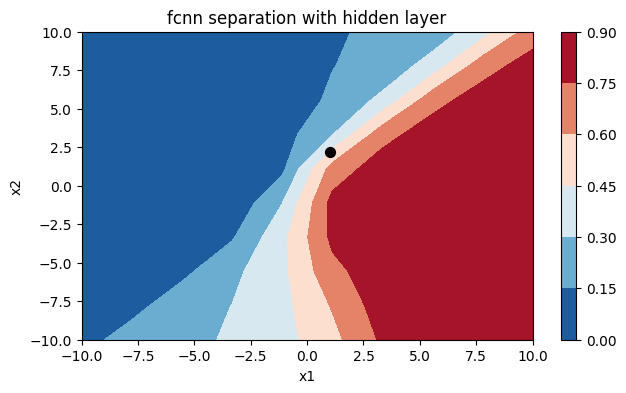

In [202]:
plotModel(predict_hidden, title='fcnn separation with hidden layer')
plt.scatter(x1,x2,c="black",s=50)

#### Exercise
Play around with the values for x1 and x2 and check if the position at the decision boundary
matches the predicted probability
How does the decision boundary look?  

Add a second hidden Layer, with 8 nodes.

In [203]:
# we use the same values for x1 and x2 and random normal values for the weights
np.random.seed(22)

# Data Array
X=np.array([[x1,x2]])

# Weigths
W1_=np.reshape((np.random.normal(0,1,16)),(2,8))
np.random.seed(22)
b1_=np.reshape((np.random.normal(0,1,8)),(8,))
np.random.seed(22)
W2_=np.reshape((np.random.normal(0,1,64)),(8,8))
np.random.seed(22)
b2_=np.reshape((np.random.normal(0,1,8)),(8,))
np.random.seed(22)
W3_=np.reshape((np.random.normal(0,1,8)),(8,1))
np.random.seed(22)
b3_=np.reshape((np.random.normal(0,1,1)),(1,))

# Print the shapes of the input, weights, and biases
print(f'X shape:   {X.shape}')
print(f'W1_ shape: {W1_.shape}')
print(f'b1_ shape: {b1_.shape}')
print(f'W2_ shape: {W2_.shape}')
print(f'b2_ shape: {b2_.shape}')
print(f'W3_ shape: {W3_.shape}')
print(f'b3_ shape: {b3_.shape}')

X shape:   (1, 2)
W1_ shape: (2, 8)
b1_ shape: (8,)
W2_ shape: (8, 8)
b2_ shape: (8,)
W3_ shape: (8, 1)
b3_ shape: (1,)


In [204]:
# Hidden layer 1
hidden1=sigmoid(np.matmul(X,W1_)+b1_)
print(hidden1)

# Hidden layer 2 , output of hidden 1 goes in here as input
hidden2=sigmoid(np.matmul(hidden1,W2_)+b2_)
print(hidden2)

[[0.76752454 0.01533699 0.90265373 0.27163597 0.57707969 0.41351693
  0.37964327 0.52893641]]
[[0.50528254 0.14298639 0.86827556 0.39910182 0.51924199 0.01833643
  0.61534173 0.18421898]]


In [205]:
# applying the activation function sigmoid
p_out=sigmoid(np.matmul(hidden2,W3_)+b3_)
p_out

array([[0.64217449]])

In [206]:
## function to return the probanility output after the hidden layer
def predict_hidden(X:np.array):
    hidden1=sigmoid(np.matmul(X,W1_)+b1_)
    hidden2=sigmoid(np.matmul(hidden1,W2_)+b2_)
    return(sigmoid(np.matmul(hidden2,W3_)+b3_))

In [207]:
X,predict_hidden(X)

(array([[1. , 2.2]]), array([[0.64217449]]))

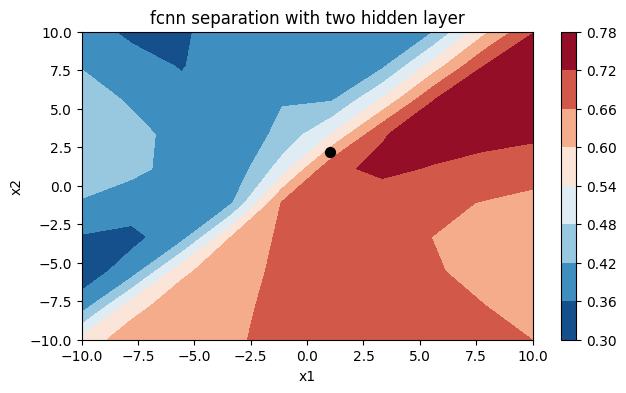

In [208]:
plotModel(predict_hidden, title='fcnn separation with two hidden layer')
plt.scatter(x1,x2,c="black",s=50)

## Answer

- The Decision boundries are now even more differnetly shaped as in the 1 hidden layer example, they divide the space in much diverser regions than without hidden layers.


# Keras

[Visit Keras Documentation](https://keras.io/2.15/api/)

**Look at this part after the introduction of Keras.**


We now do the same as above using Keras.

### Forward pass in keras

In [209]:
model = Sequential()                                        # starts the definition of the network
model.add(Dense(1, batch_input_shape=(None, 2),             # adds a new layer to the network with a single neuron
                activation='sigmoid'))                      # The input is a tensor of size (batch_size, 2),
                                                            # since we don’t specify the Batch Size now, we use None as a placeholder
                                                            # chooses the activation function ‘sigmoid’

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
model.set_weights([W,np.array([b])])                        ## set the weights of the model to w1 w2 and b

1/1 [==============================] - 0s 15ms/step


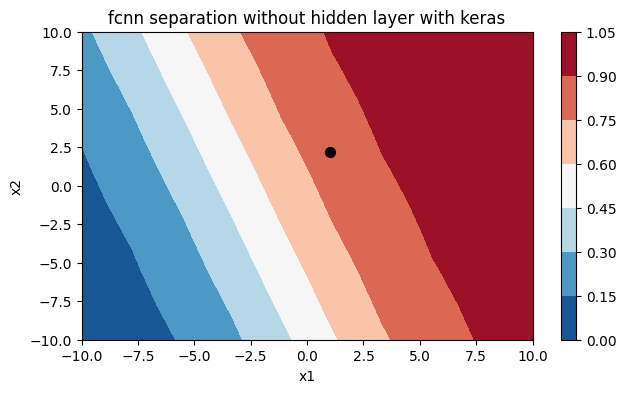

In [211]:
# Plotting the decision boundary
plotModel(model.predict, 'fcnn separation without hidden layer with keras')
plt.scatter(X[0][0],X[0][1],c="black",s=50)

### Forward pass with hidden layer (keras)

In [212]:
model = Sequential()
model.add(Dense(8, batch_input_shape=(None, 2),activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 24        
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [213]:
model.set_weights([W1,b1,W2,b2]) ## set the weights of the model to W1, b1, W2 and b2

1/1 [==============================] - 0s 17ms/step


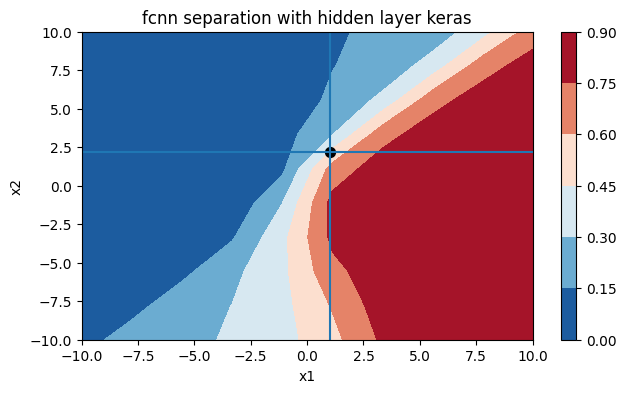

In [214]:
# Plotting the decision boundary

plotModel(model.predict, 'fcnn separation with hidden layer keras')
plt.scatter(X[0][0],X[0][1],c="black",s=50)
# moving the x1 or x2 values along the lines to change the probas
plt.vlines(X[0][0],-10,10)
plt.hlines(X[0][1],-10,10)